# Ease Of Movement Indicator

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import classification_report_generator as crg
from ta.volume import EaseOfMovementIndicator

import sys
sys.path.insert(0, '..')
import useful_functions as uf

In [2]:
df = pd.read_csv("../data/BTCUSDT-hour-target-nvi.csv")

## Variations and default correlations

Choose eom_sma_50

In [3]:
def variations(windows:list[int]):
    """
    returns variations of atr indicator with given windows
    """
    name = "eom_"
    for w in windows:
        eom = EaseOfMovementIndicator(df.high, df.low, df.volume, window=w)
#         df[name + str(w)] = eom.ease_of_movement()
        df[name + "sma_" + str(w)] = eom.sma_ease_of_movement()

In [4]:
variations([50, 100, 500, 1000])

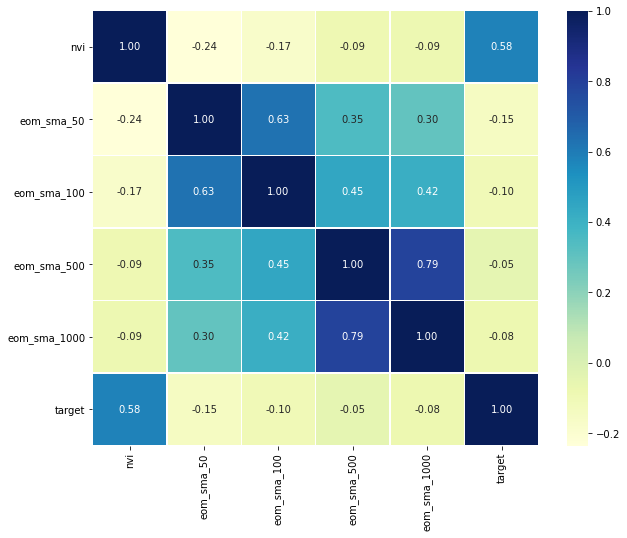

In [5]:
indicators = list(df.columns)[13:]
indicators.append("target")

d = df[list(indicators)].copy()
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

In [6]:
d = df[-2000:]

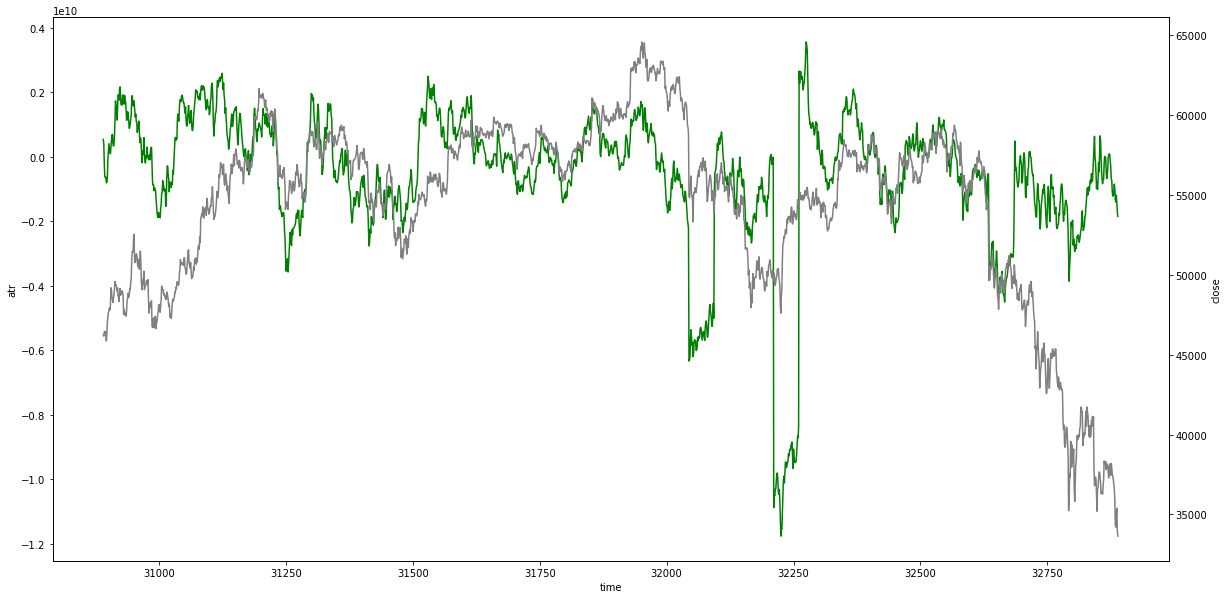

In [7]:
fig,ax = plt.subplots(figsize=(20, 10))
ax.plot(d.eom_sma_50,
        color="green")
ax.set_xlabel("time")
ax.set_ylabel("atr")

ax2=ax.twinx()
ax2.plot(d.close,
         color="gray")

ax2.set_ylabel("close")
# fig.legend(["a", "b", "c", "d"])
plt.show()

## EOM SMA 50 minus SMA of EOM SMA

In [8]:
df["eom_sma_50_diff_eom_sma_50_sma"]= list(map(lambda e, s: e-s, df.eom_sma_50, uf.get_moving_average(df.eom_sma_50, 50)))
df["eom_sma_50_diff_eom_sma_50_sma_log"]= list(map(lambda x: uf.log_abs(x), df.eom_sma_50_diff_eom_sma_50_sma))



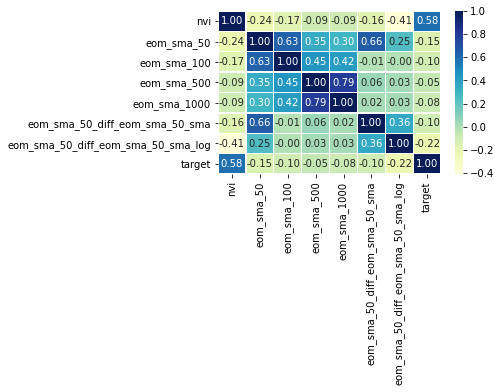

In [9]:
indicators = list(df.columns)[13:]
indicators.append("target")

d = df[list(indicators)].copy()
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(5, 3))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

In [10]:
d = df[-2000:]

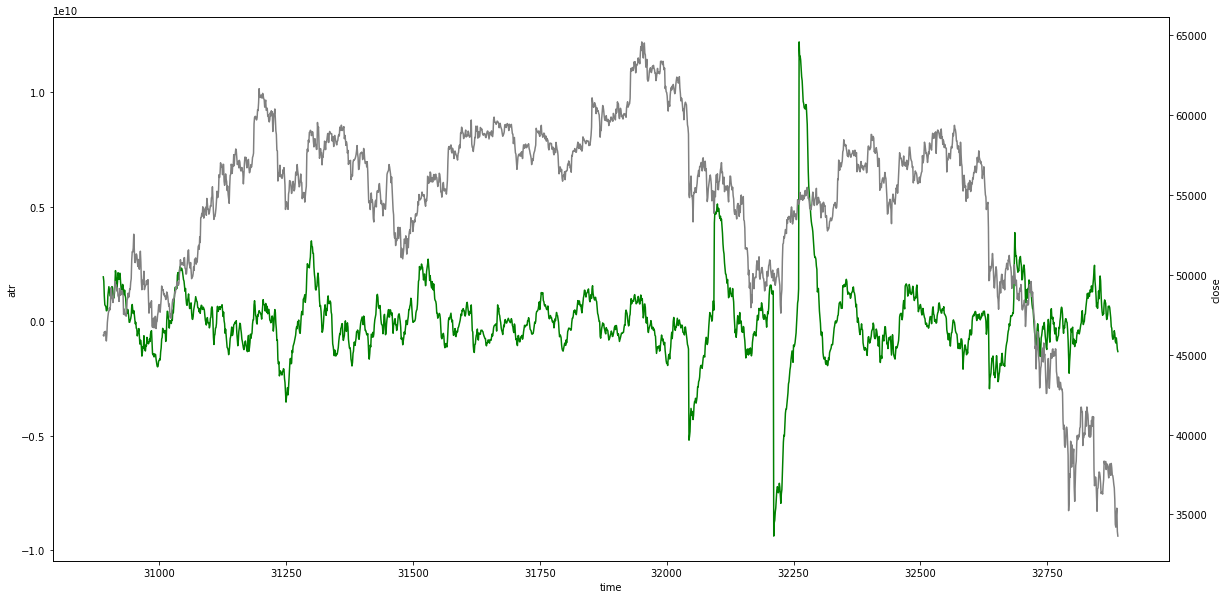

In [11]:
fig,ax = plt.subplots(figsize=(20, 10))
ax.plot(d.eom_sma_50_diff_eom_sma_50_sma,
        color="green")
ax.set_xlabel("time")
ax.set_ylabel("atr")

ax2=ax.twinx()
ax2.plot(d.close,
         color="gray")

ax2.set_ylabel("close")
# fig.legend(["a", "b", "c", "d"])
plt.show()

## Try balancing

In [40]:
df["eom_amplified"] = list(map(lambda x: uf.log_abs(x*-10), df.eom_sma_50))
df["eom_amplified_rate"] = uf.get_rate(uf.get_moving_average(df.eom_amplified, 200))

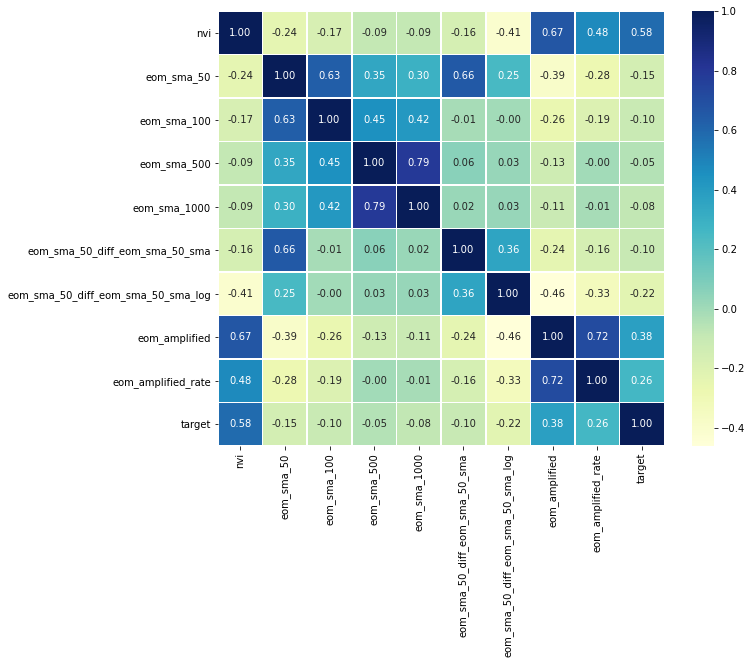

In [41]:
indicators = list(df.columns)[13:]
indicators.append("target")

d = df[list(indicators)].copy()
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

In [49]:
d = df[-2000:]

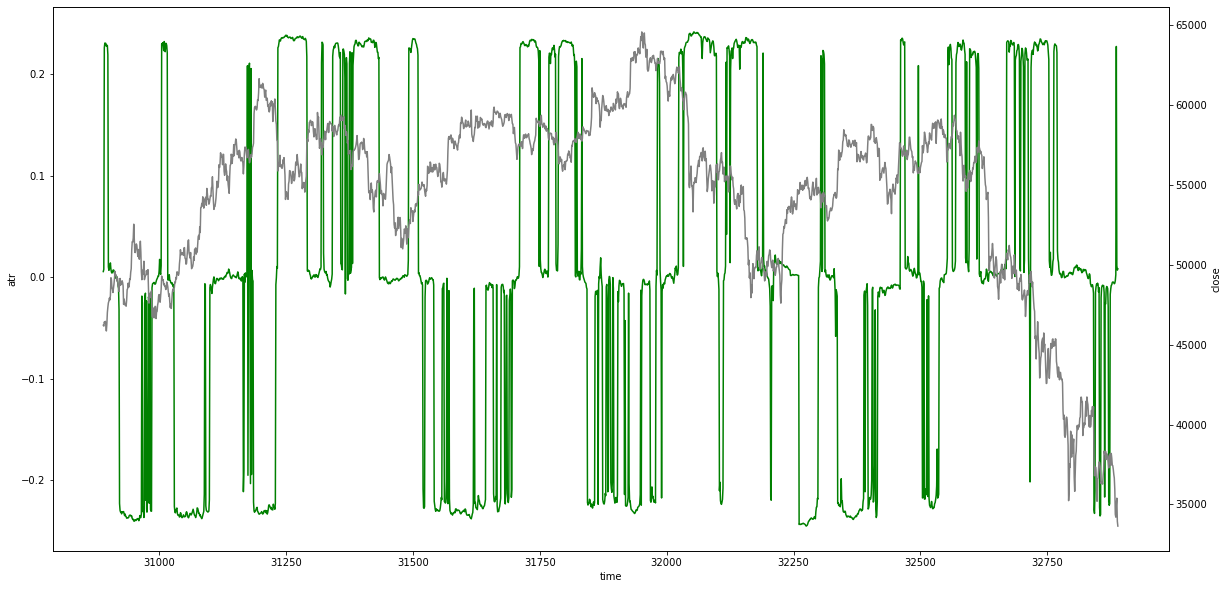

In [51]:
fig,ax = plt.subplots(figsize=(20, 10))
ax.plot(d.eom_amplified_rate,
        color="green")
ax.set_xlabel("time")
ax.set_ylabel("atr")

ax2=ax.twinx()
ax2.plot(d.close,
         color="gray")

ax2.set_ylabel("close")
# fig.legend(["a", "b", "c", "d"])
plt.show()

# Conclusion: eom amplified